<a href="https://colab.research.google.com/github/vvicky30/python/blob/master/prac_cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install netCDF4 #netcd-version-4  has many features not found in earlier versions of the library,
# such as hierarchical groups, zlib compression, multiple unlimited dimensions, and new data types. 
#It is implemented on top of HDF5. This module implements most of the new features,
# and can read and write netCDF files compatible with older versions of the library.
# The API is modelled after Scientific.IO.NetCDF, and should be familiar to users of that module.

     |████████████████████████████████| 4.1MB 91kB/s 
     |████████████████████████████████| 317kB 41.1MB/s 


In [0]:
from netCDF4 import Dataset, MFDataset, num2date #MFDataset is used to read multiple netcdf4 files 
#there is also num2date a functions used for following :-
### def num2date(	...)
#num2date(times,units,calendar='standard')
#Return datetime objects given numeric time values. The units of the numeric time values are described by the units argument and the calendar keyword. 
#The returned datetime objects represent UTC with no time-zone offset, even if the specified units contain a time-zone offset.

##times: numeric time values.

##units: a string of the form <time units> since <reference time> describing the time units.
#<time units> can be days, hours, minutes, seconds, milliseconds or microseconds. 
#<reference time> is the time origin. months_since is allowed only for the 360_day calendar.

##calendar: describes the calendar used in the time calculations. 
#All the values currently defined in the CF metadata convention Valid calendars 'standard', 'gregorian',

In [0]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from matplotlib import cm#for choosing color maps

In [8]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy #here we install cartopy like this for some resolving pre-reqisite issues related to the cartopy otherwise installer reports error 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
     |████████████████████████████████| 8.9MB 7.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████

In [10]:
!pip install cmocean #as usual

     |████████████████████████████████| 225kB 7.8MB/s 


In [0]:
import cartopy.crs as ccrs
from cmocean import cm as cmo
#The cartopy is a great tool for creating maps in many ways more advanced than the usual workhorse for map creation in pyhton - the Basemap module.
#and the cmocean contains colormaps for commonly-used oceanographic variables. Most of the colormaps started from matplotlib colormaps,
# but cmocean have now been adjusted using the viscm tool to be perceptually uniform.

In [12]:
import sys
import os
from cartopy.util import add_cyclic_point
'''
cartopy.util.add_cyclic_point(data, coord=None, axis=-1)[source]
Add a cyclic point to an array and optionally a corresponding coordinate.

Args:
data:
An n-dimensional array of data to add a cyclic point to.

Kwargs:
coord:
A 1-dimensional array which specifies the coordinate values for the dimension the cyclic point is to be added to. The coordinate values must be regularly spaced.
axis:
Specifies the axis of the data array to add the cyclic point to. Defaults to the right-most axis.

Returns:
cyclic_data:
The data array with a cyclic point added.
cyclic_coord:
The coordinate with a cyclic point, only returned if the coord keyword was supplied.
'''

'\ncartopy.util.add_cyclic_point(data, coord=None, axis=-1)[source]\nAdd a cyclic point to an array and optionally a corresponding coordinate.\n\nArgs:\ndata:\nAn n-dimensional array of data to add a cyclic point to.\n\nKwargs:\ncoord:\nA 1-dimensional array which specifies the coordinate values for the dimension the cyclic point is to be added to. The coordinate values must be regularly spaced.\naxis:\nSpecifies the axis of the data array to add the cyclic point to. Defaults to the right-most axis.\n\nReturns:\ncyclic_data:\nThe data array with a cyclic point added.\ncyclic_coord:\nThe coordinate with a cyclic point, only returned if the coord keyword was supplied.\n'

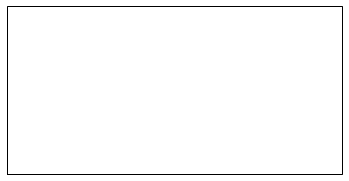

In [13]:
plt.axes(projection=ccrs.PlateCarree())#actually see the cartopy+matplotlib dance in action:

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


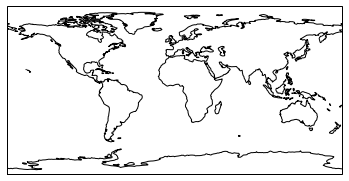

In [14]:
#One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the coastlines method. With no arguments,
# it will add the Natural Earth-scale coastline data to the map.
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [15]:
#Projection classes have options we can use to customize the map..as shown below:-
ccrs.PlateCarree?
#there are several projections style along with several globe reperesentation as :
'''
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
'''

'\nParameters\n----------\nproj4_params: iterable of key-value pairs\n    The proj4 parameters required to define the\n    desired CRS.  The parameters should not describe\n    the desired elliptic model, instead create an\n    appropriate Globe instance. The ``proj4_params``\n    parameters will override any parameters that the\n    Globe defines.\nglobe: :class:`~cartopy.crs.Globe` instance, optional\n    If omitted, the default Globe instance will be created.\n    See :class:`~cartopy.crs.Globe` for details.\n'

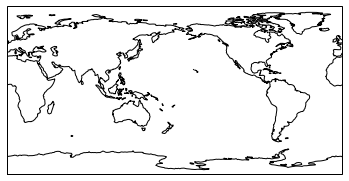

In [16]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines() #by usinf options of projection class "ccrs.platecarree" which is Central_longitude here ,we can analyse world-map from several positions

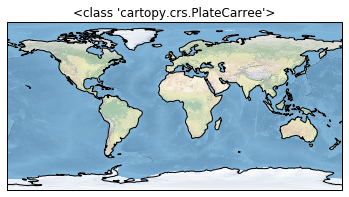

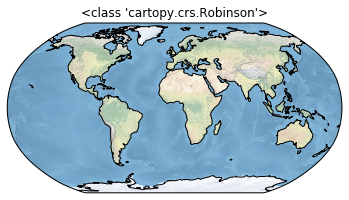

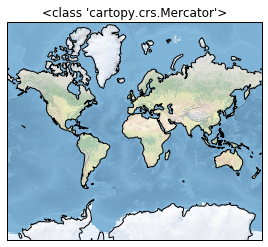

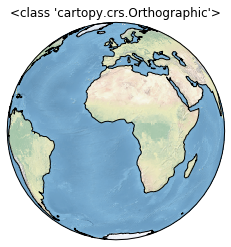

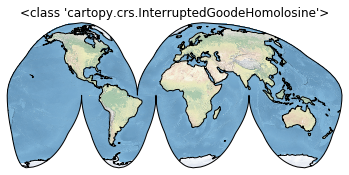

In [17]:
#Different Global Projections:-
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

In [0]:
##Regional Maps-----------
#To create a regional map, we use the set_extent method of GeoAxis to limit the size of the region.
ax.set_extent?
'''
Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extent
    Tuple of floats representing the required extent (x0, x1, y0, y1).
'''

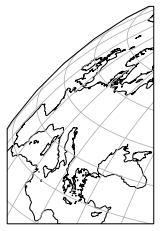

In [26]:
#implementing set_extent
central_lon, central_lat = 78.962883,  20.5936832  #here i used india map coordinates
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
#here we pass the central latitude &logitude as the options or arguments in projection class orthographic
ax.set_extent(extent)
ax.gridlines()#for grid lines on projected map
ax.coastlines(resolution='50m')

**Adding Features to the Map**
*To give our map more styles and details, we add cartopy.feature objects. Many useful features are built in. These "default features" are at coarse (110m) resolution.*

cartopy.feature.BORDERS	Country boundaries

cartopy.feature.COASTLINE	Coastline, including major islands

cartopy.feature.LAKES	Natural and artificial lakes

cartopy.feature.LAND	Land polygons, including major islands

cartopy.feature.OCEAN	Ocean polygons

cartopy.feature.RIVERS	Single-line drainages, including lake centerlines

cartopy.feature.STATES	(limited to the United States at this scale)

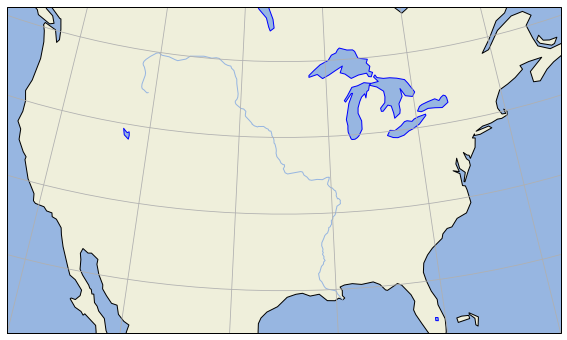

In [40]:
import cartopy.feature as cfeature #cartopy feature imported
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat)) #passing coordinates as argument to the .AlbersEqualArea-projection class
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN) #for ocean polygons
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS) # Single-line drainages, including lake centerlines
ax.gridlines()

In [0]:
#Adding Data to the Map
#Now that we know how to create a map, let's add our data to it! That's the whole point.

#Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots. By default,
#the map extent will be adjusted to match the data. We can override this with the .set_global or .set_extent commands.
new_york = dict(lon=-74.0060, lat= 40.7128)  
jaipur = dict(lon=75.78, lat=26.91)
#here i create my own longitude and latitude dataset with the help of original coordinates of new-delhi anf jaipur
lons = [new_york['lon'], jaipur['lon']]
lats = [new_york['lat'], jaipur['lat']]

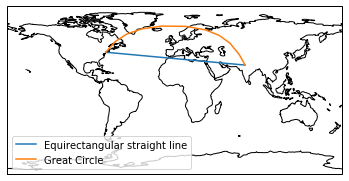

In [44]:
#now we mappin g out above created coordinates or our own data by the the following:-
#the data also have to be transformed to the projection space.
#This is done via the transform= keyword in the plotting method. The argument is another cartopy.crs object. 
#If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

In [45]:
#Showing Images
#We can plot a satellite image easily on a map if we know its extent
! wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
#for instance we here download NASA's sattelite image for which we already knows its extent

--2019-12-26 18:54:52--  https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
Resolving lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)... 198.118.194.28, 2001:4d0:241a:40c0::28
Connecting to lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)|198.118.194.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256220 (250K) [image/jpeg]
Saving to: ‘Miriam.A2012270.2050.2km.jpg’

Miriam.A2012270.205 100%[===================>] 250.21K   968KB/s    in 0.3s    

2019-12-26 18:54:53 (968 KB/s) - ‘Miriam.A2012270.2050.2km.jpg’ saved [256220/256220]



Text(-117, 33, 'San Diego')

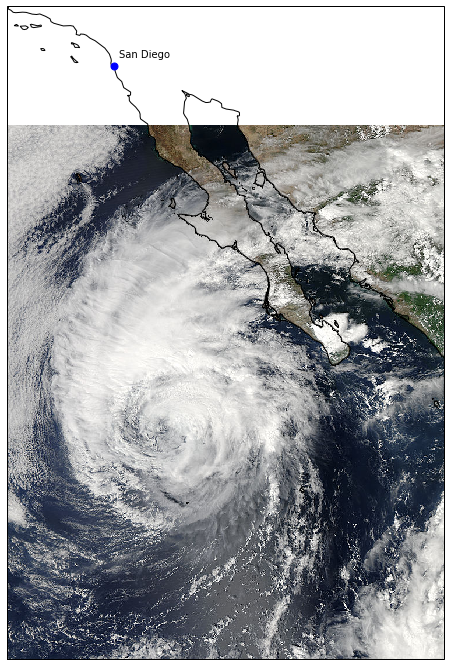

In [48]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

**Xarray Integration**

Cartopy transforms can be passed to xarray! This creates a very quick path for creating professional looking maps from netCDF data.

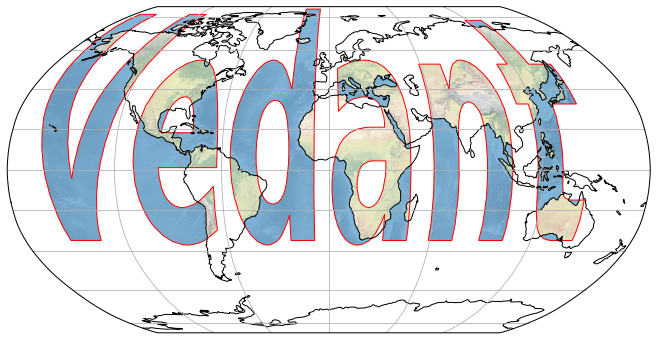

In [60]:
import matplotlib.textpath
import matplotlib.patches
from matplotlib.font_manager import FontProperties
import numpy as np

def main():
    fig = plt.figure(figsize=[12, 6])
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    ax.coastlines()
    ax.gridlines()

    # generate a matplotlib path representing the word "VEDANT"
    fp = FontProperties(family='Bitstream Vera Sans', weight='bold')
    logo_path = matplotlib.textpath.TextPath((-175, -35), 'Vedant',
                                             size=1, prop=fp)
    # scale the letters up to sensible longitude and latitude sizes
    logo_path._vertices *= np.array([80, 160])

    # add a background image
    im = ax.stock_img()
    # clip the image according to the logo_path. mpl v1.2.0 does not support
    # the transform API that cartopy makes use of, so we have to convert the
    # projection into a transform manually
    plate_carree_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    im.set_clip_path(logo_path, transform=plate_carree_transform)

    # add the path as a patch, drawing black outlines around the text
    patch = matplotlib.patches.PathPatch(logo_path,
                                         facecolor='none', edgecolor='red',
                                         transform=ccrs.PlateCarree())
    ax.add_patch(patch)

    plt.show()


if __name__ == '__main__':
    main()